In [1]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt

In [2]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, 
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# Early Stopping
es = EarlyStopping(
    monitor='val_loss',
    patience=200,
    verbose=1,
    mode=min
)

#Checkpoint
mc = ModelCheckpoint(
    'best_m.h5',
    monitor='val_accuracy',
    mode='max',
    verbose=1,
    save_best_only=True
)

#Fit the model
history = model.fit(
    trainX,trainy,
    validation_data=(testX,testy),
    epochs=4000,
    callbacks=[es,mc],
    verbose=2
)

Epoch 1/4000

Epoch 00001: val_accuracy improved from -inf to 0.78571, saving model to best_m.h5
1/1 - 2s - loss: 0.6698 - accuracy: 0.8333 - val_loss: 0.6638 - val_accuracy: 0.7857 - 2s/epoch - 2s/step
Epoch 2/4000

Epoch 00002: val_accuracy did not improve from 0.78571
1/1 - 0s - loss: 0.6537 - accuracy: 0.8667 - val_loss: 0.6534 - val_accuracy: 0.7286 - 25ms/epoch - 25ms/step
Epoch 3/4000

Epoch 00003: val_accuracy did not improve from 0.78571
1/1 - 0s - loss: 0.6379 - accuracy: 0.9333 - val_loss: 0.6434 - val_accuracy: 0.7286 - 24ms/epoch - 24ms/step
Epoch 4/4000

Epoch 00004: val_accuracy did not improve from 0.78571
1/1 - 0s - loss: 0.6226 - accuracy: 0.9333 - val_loss: 0.6338 - val_accuracy: 0.7286 - 24ms/epoch - 24ms/step
Epoch 5/4000

Epoch 00005: val_accuracy did not improve from 0.78571
1/1 - 0s - loss: 0.6077 - accuracy: 0.9000 - val_loss: 0.6244 - val_accuracy: 0.7286 - 24ms/epoch - 24ms/step
Epoch 6/4000

Epoch 00006: val_accuracy did not improve from 0.78571
1/1 - 0s - l

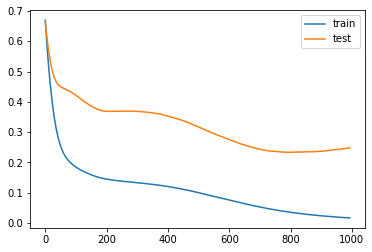

In [3]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.savefig('es_loss.png')
plt.show()

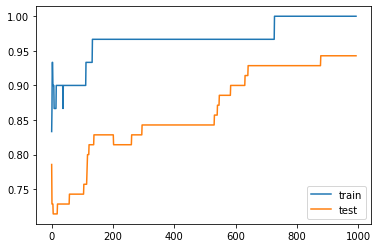

In [4]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.savefig('acc_es.png')
plt.show()

In [ ]:
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))